In [2]:
import datetime
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from prophet import Prophet


In [31]:
ticker = "^N225"

start = datetime.date(1980, 1, 1)
end = datetime.datetime.now() + datetime.timedelta(days = 1)

In [32]:
yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)
df.to_csv(ticker+'_daily_data.csv', encoding='utf8')

[*********************100%***********************]  1 of 1 completed


In [33]:
df["SMA25"] = df["Close"].rolling(window=25).mean()
df["SMA50"] = df["Close"].rolling(window=50).mean()
df["SMA75"] = df["Close"].rolling(window=75).mean()

df.to_csv(ticker+'_daily_data.csv', encoding='utf8')
df

,Open,High,Low,Close,Adj Close,Volume,SMA25,SMA50,SMA75
Date,,,,,,,,,
1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0,NaN,NaN,NaN
1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0,NaN,NaN,NaN
1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0,NaN,NaN,NaN
1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0,NaN,NaN,NaN
1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-31,33128.828125,33402.078125,33025.929688,33172.218750,33172.218750,134300000,32749.488203,32447.512852,31308.153359
2023-08-01,33292.308594,33488.769531,33203.878906,33476.578125,33476.578125,110800000,32780.598906,32495.308008,31380.071745
2023-08-02,33123.121094,33158.578125,32628.289062,32707.689453,32707.689453,124200000,32787.373281,32530.306406,31440.747995


In [9]:
import matplotlib
import mplfinance as mpf


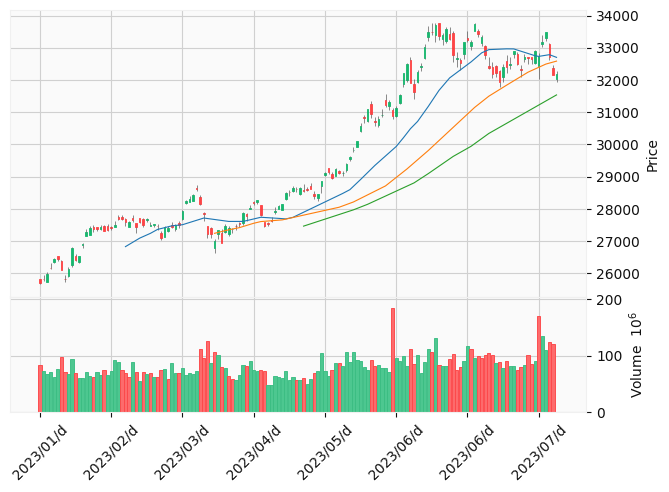

In [34]:
graphStart = datetime.date(2023, 1, 1)

#計算した移動平均線を表示するための準備。
apd_day_ave  = [
                        mpf.make_addplot(df[graphStart:]['SMA25'],
                                        panel=0,color='r', width=1,alpha=0.7),
                        mpf.make_addplot(df[graphStart:]['SMA50'],
                                        panel=0,color='g', width=1,alpha=0.7),
                        mpf.make_addplot(df[graphStart:]['SMA75'],
                                        panel=0,color='b', width=1,alpha=0.7),       
                ]

mpf.plot(df[graphStart:], type='candle', mav=(25, 50, 75), datetime_format='%Y/%m/d', 
         tight_layout=False, volume=True, style='yahoo')

mpf.plot(df[graphStart:], type='candle', mav=(25, 50, 75), datetime_format='%Y/%m/d', 
         tight_layout=False, volume=True, style='yahoo', savefig=str(ticker)+'_daily.png')

In [38]:
# df.reset_index(inplace=True)

df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA25,SMA50,SMA75
0,1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0,NaN,NaN,NaN
1,1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0,NaN,NaN,NaN
2,1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0,NaN,NaN,NaN
3,1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0,NaN,NaN,NaN
4,1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10720,2023-07-31,33128.828125,33402.078125,33025.929688,33172.218750,33172.218750,134300000,32749.488203,32447.512852,31308.153359
10721,2023-08-01,33292.308594,33488.769531,33203.878906,33476.578125,33476.578125,110800000,32780.598906,32495.308008,31380.071745
10722,2023-08-02,33123.121094,33158.578125,32628.289062,32707.689453,32707.689453,124200000,32787.373281,32530.306406,31440.747995
10723,2023-08-03,32375.849609,32467.060547,32142.250000,32159.279297,32159.279297,120300000,32745.984922,32559.838398,31489.625443


In [40]:
df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
df

,ds,Open,High,Low,Close,y,Volume,SMA25,SMA50,SMA75
0,1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0,NaN,NaN,NaN
1,1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0,NaN,NaN,NaN
2,1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0,NaN,NaN,NaN
3,1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0,NaN,NaN,NaN
4,1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10720,2023-07-31,33128.828125,33402.078125,33025.929688,33172.218750,33172.218750,134300000,32749.488203,32447.512852,31308.153359
10721,2023-08-01,33292.308594,33488.769531,33203.878906,33476.578125,33476.578125,110800000,32780.598906,32495.308008,31380.071745
10722,2023-08-02,33123.121094,33158.578125,32628.289062,32707.689453,32707.689453,124200000,32787.373281,32530.306406,31440.747995
10723,2023-08-03,32375.849609,32467.060547,32142.250000,32159.279297,32159.279297,120300000,32745.984922,32559.838398,31489.625443


In [41]:
N = Prophet()
N.fit(df)

future = N.make_future_dataframe(periods=365)
future.tail()



08:40:59 - cmdstanpy - INFO - Chain [1] start processing
08:41:03 - cmdstanpy - INFO - Chain [1] done processing


,ds
11085,2024-07-30
11086,2024-07-31
11087,2024-08-01
11088,2024-08-02
11089,2024-08-03


In [42]:
forecast = N.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1980-01-04,6656.497072,4769.098386,8578.093289
1,1980-01-07,6624.476931,4710.962584,8520.998954
2,1980-01-08,6636.713509,4677.010635,8513.762650
3,1980-01-09,6638.441753,4763.147936,8484.758992
4,1980-01-10,6640.239171,4845.909937,8525.679334
...,...,...,...,...
11085,2024-07-30,30908.725964,28338.516772,33146.030504
11086,2024-07-31,30900.868209,28523.987596,33109.976164
11087,2024-08-01,30893.194615,28492.916739,33260.964336
11088,2024-08-02,30881.537198,28364.304871,33188.795457


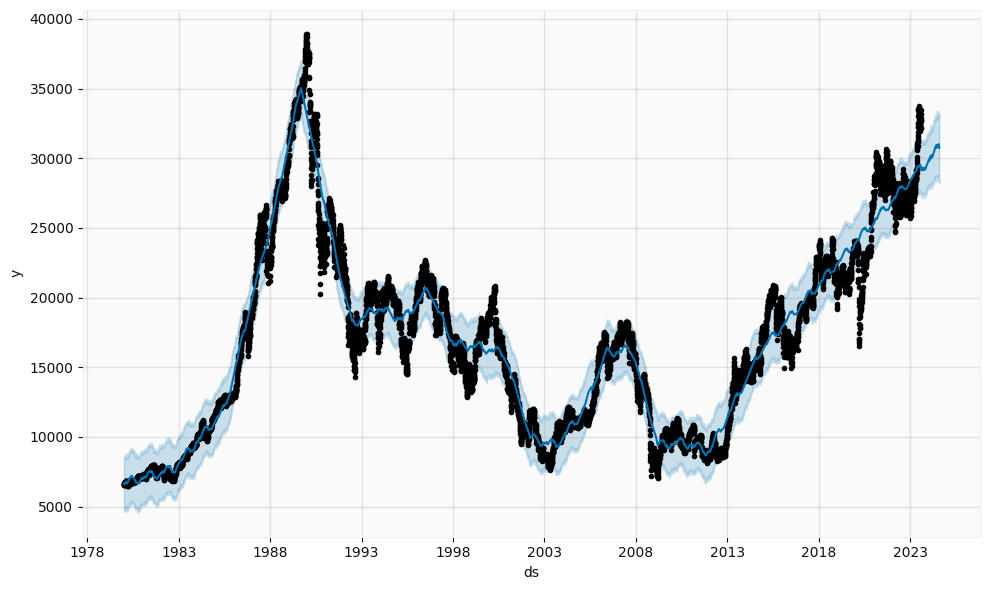

In [43]:
fig1 = N.plot(forecast)